Este proyecto se realiza en equipos.

Objetivo general del proyecto
Aplicar diversas variantes del algoritmo de regresión en la solución de un problema de aprendizaje automático.

Problema a solucionar
Estimar la puntuación de calidad de un vino.

Base de datos (véase archivo anexo)
https://archive.ics.uci.edu/ml/datasets/wine+quality

Actividades a desarrollar
En clase se estudió el algoritmo "Batch Gradient Descent". Investigar acerca de las siguientes variantes del algoritmo: (a) Stochastic Gradient Descent y (b) Mini-batch Gradient Descent. ¿Cuáles son las diferencias y las ventajas/desventajas entre estas variantes? ¿cuáles son las condiciones bajo las cuales se prefieren aplicar estas variantes?
Investigar acerca de los procesos de normalización y estandarización de los parámetros de entrada (features).
Implementar en Python algoritmos "Multivariate Linear Regression" para la solución del problema, en sus variantes: (a) Ecuación Normal, (b) Batch Gradient Descent, (c) Stochastic Gradient Descent y (d) Mini-batch Gradient Descent; comparar las soluciones obtenidas.
Investigar acerca del algoritmo "Polynomial Regression". ¿Cuándo se aplica?, ¿qué problemas puede presentar una solución basada en este algoritmo?
Implementar en Python el algoritmo de "Polynomial Regression" para la solución de: (a) un conjunto (nube) de datos generados artificialmente (véase ejemplo de clase), y (b) el problema de la calidad del vino. Para el inciso (b) se recomienda revisar el tema "Turning a linear regression model into a curve – polynomial regression", del libro "Python Machine Learning".
Conclusiones generales a nivel de equipo; comentarios individuales (véase rúbrica).
Elaborar el "Reporte 1" especificado en la presentación del primer día de clases. Debe documentarse la información de los incisos 1-6.
Elaborar una video-entrega (todos los integrantes del equipo deberán participar). Como parte de la evaluación se consideran el dominio, la comprensión y la profundidad plasmadas en las explicaciones. Debe presentarse la información de los incisos 1-6.

Revisar en la presentación del primer día de clases
Los requisitos para la "Entrega en plataforma digital".
Los criterios de evaluación de (a) la "Entrega virtual" y (b) el "Reporte digital".


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Data loading

In [2]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


# Data reestructuring

In [3]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [4]:
y = np.array(y)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

# Dividing the data 

In [5]:
from sklearn import linear_model  # Importing linear model

lm = linear_model.LinearRegression()   # Linear regression
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i > 1280: 
        x_test.append(x[i])
        y_test.append(y[i])
    else:
        x_train.append(x[i])
        y_train.append(y[i])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test  = np.array(x_test)
y_test  = np.array(y_test)


lm.fit(x_train, y_train)   


LinearRegression()

In [6]:
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

x_train.shape[0]

1281

In [7]:
x_train

array([[ 1.   ,  7.4  ,  0.7  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  7.8  ,  0.88 , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  7.8  ,  0.76 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  8.   ,  0.715, ...,  3.24 ,  0.54 ,  9.5  ],
       [ 1.   ,  9.8  ,  0.3  , ...,  3.14 ,  0.57 , 11.5  ],
       [ 1.   ,  7.1  ,  0.46 , ...,  3.37 ,  0.64 , 10.4  ]])

In [74]:
y_train = y_train.reshape(y_train.shape[0],)

y_train

array([5, 5, 5, ..., 6, 7, 6])

Following one traditional method in data testing by machine learning we make sure to creata data to train, and data to test, with that we can test our hipothesis with unknown data, so our results are not compromise.

# Creating our  intercept and coefficient with sk methods

In [9]:
print(lm.intercept_, lm.coef_)

[23.89454619] [[ 2.32202243e-02 -1.05524992e+00 -1.82338385e-01  1.05063499e-02
  -1.75934685e+00  3.33749498e-03 -3.69899220e-03 -1.99827364e+01
  -3.44406023e-01  8.05064126e-01  2.83349759e-01]]


# Batch Gradient descent

In [85]:
number_of_features = x_train.shape[1]

theta_batch =  np.ones(shape=(number_of_features)) 
theta_batch

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [86]:


eta = 0.0001
n_iter = 5000
m = x_train.shape[0]


j = np.zeros(n_iter)

for i in range(n_iter):
    j[i] = (1/(2*m))* (((x_train @ theta_batch)  - y_train)**2).sum()
    theta_batch = theta_batch - eta*(1/m * (x_train.T.dot((np.dot(theta_batch, x_train.T))  - y_train)))


theta_batch

array([ 0.89202943, -0.03204222,  0.91765063,  0.96985042,  0.34545198,
        0.98539733,  0.0119049 , -0.01153769,  0.89193255,  0.6430154 ,
        0.9311592 ,  0.00547562])

In [12]:
print(lm.intercept_, lm.coef_)


[23.89454619] [[ 2.32202243e-02 -1.05524992e+00 -1.82338385e-01  1.05063499e-02
  -1.75934685e+00  3.33749498e-03 -3.69899220e-03 -1.99827364e+01
  -3.44406023e-01  8.05064126e-01  2.83349759e-01]]


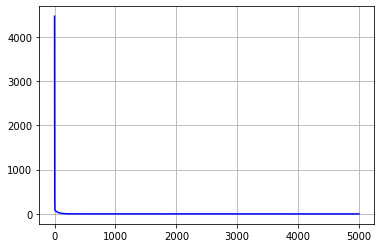

In [87]:
plt.plot(np.arange(n_iter),j,"b-")
plt.grid(True)
plt.show()

In [14]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [88]:
def prediction_raw(theta_batch, x_test, num_index):

    test = theta_batch[0] + theta_batch[1]*x_test[num_index][0] + theta_batch[2]*x_test[num_index][1]+theta_batch[3]*x_test[num_index][2]+theta_batch[4]*x_test[num_index][3]+theta_batch[5]*x_test[num_index][4]+theta_batch[6]*x_test[num_index][5]+theta_batch[7]*x_test[num_index][6]+theta_batch[8]*x_test[num_index][7]+theta_batch[9]*x_test[num_index][8]+theta_batch[10]*x_test[num_index][9]+theta_batch[11]*x_test[num_index][10]

    return test

In [89]:
prediction_batch_des = []

for i in range(len(x_test)):
    prediction_batch_des.append(prediction_raw(theta_batch, x_test, i))
prediction_batch_des[:10]

[5.431013733461483,
 5.690539016276744,
 5.524813375814225,
 5.549067376843759,
 5.264047561924657,
 5.624203904352957,
 5.543964068114477,
 6.258196731644268,
 6.258196731644268,
 5.6732533467456365]

In [90]:
 predictions = lm.predict(x_test)
 predictions[:10]

array([[5.72234168],
       [5.67508873],
       [5.38668875],
       [5.8991857 ],
       [5.84838829],
       [6.60509892],
       [6.37785715],
       [5.68674151],
       [5.68674151],
       [5.65741127]])

# Stochastic Gradient Descent

In [113]:
x_train

array([[ 1.   ,  7.4  ,  0.7  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  7.8  ,  0.88 , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  7.8  ,  0.76 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  8.   ,  0.715, ...,  3.24 ,  0.54 ,  9.5  ],
       [ 1.   ,  9.8  ,  0.3  , ...,  3.14 ,  0.57 , 11.5  ],
       [ 1.   ,  7.1  ,  0.46 , ...,  3.37 ,  0.64 , 10.4  ]])

In [114]:
y_train[:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

In [115]:
number_of_features = x_train.shape[1]

theta_stoch =  np.ones(shape=(number_of_features)) 
theta_stoch

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
eta = 0.01
n_iter = 5000
m = x_train.shape[0]


j_stoch = np.zeros(n_iter)

for i in range(n_iter):
    random_index = np.random.randint(0 , m -1)
    x_sample = x_train[random_index]
    y_sample = y_stoch[random_index]

    j_stoch[i] = (1/(2*m))* (((x_train @ theta_stoch)  - y_train)**2).sum()
    theta_stoch = theta_stoch - (eta/m) * (x_sample.T.dot(((np.dot(theta_stoch, x_sample.T)) - y_sample)))   

theta_stoch

array([ 0.89787477,  0.05156481,  0.94785044,  0.96741687,  0.7051544 ,
        0.99062768, -0.01094393, -0.01496361,  0.89813257,  0.66408956,
        0.93206778, -0.08523299])

In [117]:
print(lm.intercept_, lm.coef_)

[23.89454619] [[ 2.32202243e-02 -1.05524992e+00 -1.82338385e-01  1.05063499e-02
  -1.75934685e+00  3.33749498e-03 -3.69899220e-03 -1.99827364e+01
  -3.44406023e-01  8.05064126e-01  2.83349759e-01]]


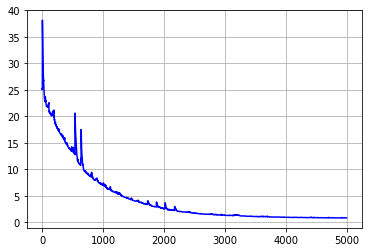

In [123]:
plt.plot(np.arange(n_iter),j_stoch,"b-")
plt.grid(True)
plt.show()

In [124]:
prediction_stoch_des = []

for i in range(len(x_test)):
    prediction_stoch_des.append(prediction_raw(theta_stoch, x_test, i))
prediction_stoch_des[:10]

[5.037348919416747,
 5.907064388085902,
 5.773493778893251,
 5.534852004614142,
 5.3751940579351105,
 5.5848589207850505,
 5.974720802574979,
 6.803443649234985,
 6.803443649234985,
 5.9223343248820495]

In [125]:
 predictions = lm.predict(x_test)
 predictions[:10]

array([[5.72234168],
       [5.67508873],
       [5.38668875],
       [5.8991857 ],
       [5.84838829],
       [6.60509892],
       [6.37785715],
       [5.68674151],
       [5.68674151],
       [5.65741127]])

# Mini-Batch Gradient Descent

In [26]:
x_train

array([[ 1.   ,  7.4  ,  0.7  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  7.8  ,  0.88 , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  7.8  ,  0.76 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  8.   ,  0.715, ...,  3.24 ,  0.54 ,  9.5  ],
       [ 1.   ,  9.8  ,  0.3  , ...,  3.14 ,  0.57 , 11.5  ],
       [ 1.   ,  7.1  ,  0.46 , ...,  3.37 ,  0.64 , 10.4  ]])

In [27]:
y_train

array([[5],
       [5],
       [5],
       ...,
       [6],
       [7],
       [6]])

In [28]:
theta_mini = np.random.randn(12).reshape(12,1)
theta_mini

array([[ 1.41131938],
       [-1.6884604 ],
       [ 0.51680012],
       [ 0.10664128],
       [ 0.16880888],
       [ 0.27508185],
       [-0.00517314],
       [ 0.14997209],
       [ 0.5379948 ],
       [-0.17638169],
       [-1.63864795],
       [ 1.03151669]])

In [128]:
number_of_features = x_train.shape[1]

theta_mini =  np.ones(shape=(number_of_features)) 
theta_mini

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [153]:
eta = 0.01
n_iter = 1000
m = x_train.shape[0]
batch_size = 5

num_batches = int(m/batch_size)
j_mini = np.zeros(n_iter)


for i in range(n_iter):
    random_indices = np.random.permutation(m)
    x_batch_size = x_train[random_indices]
    y_batch_size = y_train[random_indices]
    
    
    
    for j in range(0 , m , batch_size):
        x_mini = x_batch_size[j:j + batch_size]
        y_mini = y_batch_size[j:j + batch_size]
        theta_mini =  theta_mini  - (eta/m) * (x_mini.T.dot(((np.dot(theta_mini, x_mini.T)) - y_mini)))  
    j_mini[i] = (1/(2*m))* (((x_train @ theta_mini)  - y_train)**2).sum()    
    
theta_mini

array([ 0.77206759, -0.01610119, -0.02813931,  0.86022685, -0.0066822 ,
        0.74687915,  0.00678098, -0.00454272,  0.76893315,  0.06094787,
        0.71334645,  0.32930547])

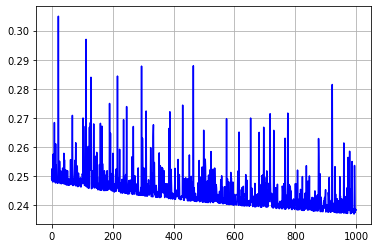

In [150]:
plt.plot(np.arange(n_iter),j_mini,"b-")
plt.grid(True)
plt.show()

In [142]:
prediction_mini_des = []

for i in range(len(x_test)):
    prediction_mini_des.append(prediction_raw(theta_mini, x_test, i))
prediction_mini_des[:10]

[5.5444409854804775,
 5.792725122481026,
 5.419680167492104,
 5.602177514470325,
 5.44668320046923,
 5.855827487556756,
 5.769758425081852,
 5.668612860606721,
 5.668612860606721,
 5.812672553027435]

In [143]:
 predictions = lm.predict(x_test)
 predictions[:10]

array([[5.72234168],
       [5.67508873],
       [5.38668875],
       [5.8991857 ],
       [5.84838829],
       [6.60509892],
       [6.37785715],
       [5.68674151],
       [5.68674151],
       [5.65741127]])